In [1]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
def calculate_result(val_player, val_opponent, action_player, action_opponent):
    '''Function that calsulates auction result'''
    
    bid_player   = val_player*action_player
    bid_opponent = val_opponent*action_opponent
    
    win_player = (bid_player>bid_opponent)*(val_player-bid_player)
    
    return win_player

def prepare_data(val_opponent, action_opponent, n):
    '''Prepare X and y for the neural network'''
    
    # valuations and actions of the player
    val_player   = np.random.beta(1,1,n)
    action_player  = np.random.beta(1,1,n)
    
    # outcome of the auction
    y = calculate_result(val_player, val_opponent, action_player, action_opponent)
    
    X = np.reshape(action_player ,[n, 1])
    y = y = np.reshape(y ,[n,]) 
    
    return X, y

def fit_model(X, y):
    
    # create a neural network
    mlp = MLPRegressor(alpha=0.001, hidden_layer_sizes = (5,2), max_iter = 1000, 
                   activation = 'logistic', verbose = True, learning_rate = 'adaptive')
    # fit model
    mlp.fit(X, y)
    
    return mlp

def opt_bid(model):
    '''Find bid with the highest expected profit'''
    
    # Create candiates for optimal points - 1000 evenly distributed bids
    n = 1000
    cand_bids = np.linspace(start=0, stop=1, num=n)
    cand_bids = np.reshape(cand_bids ,[n, 1]) 

    # Predict expected outcome for candidate points
    cand_predict = model.predict(cand_bids)

    # Optimal bid
    cand_optimal = cand_bids[np.argmax(cand_predict),0]
    
    print("Max expected profit", np.round(cand_predict[np.argmax(cand_predict)],5))
    print("Optimal bid", np.round(cand_optimal,5))
    
    return cand_optimal

def plot_result(mlp, X, y, optimal_bid, title):
    
    # predict average reward
    model_predict = mlp.predict(X)
    print(model_predict)
    # combine action, reward and average (expected) reward
    model_result = np.column_stack([X, y, model_predict])
    
    # Select sample for the graph
    n_points = 1000
    graph_sample = model_result[0:n_points,:]
    graph_sample = graph_sample[graph_sample[:,0].argsort()]
    
    #### Create graph
    fig = plt.figure() 

    # Average reward predicted by the model
    auc_avg_reward = plt.plot(graph_sample[:,0], graph_sample[:,2], label="Predicted result", color='b') 

    # Actual rewards from auctions
    auc_reward = plt.scatter(graph_sample[:,0], graph_sample[:,1], label="Auction result", color='r', alpha=0.3, s=6)
    
    # Optimal bid
    opt_bid_line = plt.axvline(x=optimal_bid, label="Optimal bid", color='k', alpha=0.3)

    # Labels
    plt.title(title)
    plt.xlabel('Bid, % of private value')
    plt.ylabel('Reward')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.show()
    
def normalize(data):
    
    min_data = min(data)
    max_data = max(data)
    
    new_data = (data-min_data)/(max_data-min_data)

    return new_data

### 20 iterations - uniform distribution of bids

Iteration # 0 

Iteration 1, loss = 0.02324587
Iteration 2, loss = 0.01678763
Iteration 3, loss = 0.01663170
Iteration 4, loss = 0.01645461
Iteration 5, loss = 0.01597117
Iteration 6, loss = 0.01584494
Iteration 7, loss = 0.01581475
Iteration 8, loss = 0.01579947
Iteration 9, loss = 0.01578733
Iteration 10, loss = 0.01577710
Iteration 11, loss = 0.01577137
Iteration 12, loss = 0.01576613
Iteration 13, loss = 0.01576155
Iteration 14, loss = 0.01575966
Iteration 15, loss = 0.01575537
Iteration 16, loss = 0.01575309
Iteration 17, loss = 0.01575167
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Max expected profit 0.184
Optimal bid 0.38939
[0.17303749 0.11715307 0.10136816 ... 0.14474232 0.13230558 0.16063007]


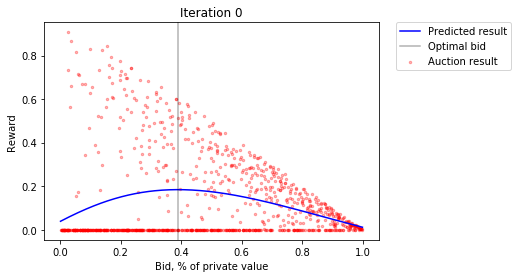

Iteration # 1 

Iteration 1, loss = 0.01677412
Iteration 2, loss = 0.01670739
Iteration 3, loss = 0.01653502
Iteration 4, loss = 0.01541517
Iteration 5, loss = 0.01502964
Iteration 6, loss = 0.01501304
Iteration 7, loss = 0.01500437
Iteration 8, loss = 0.01499893
Iteration 9, loss = 0.01499325
Iteration 10, loss = 0.01498976
Iteration 11, loss = 0.01498598
Iteration 12, loss = 0.01498313
Iteration 13, loss = 0.01497982
Iteration 14, loss = 0.01497753
Iteration 15, loss = 0.01497525
Iteration 16, loss = 0.01497305
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Max expected profit 0.20088
Optimal bid 0.44545
[0.08772152 0.08735999 0.05632704 ... 0.11356254 0.10212098 0.10916781]


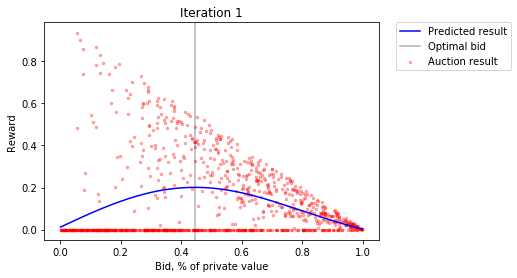

Iteration # 2 

Iteration 1, loss = 0.02882883
Iteration 2, loss = 0.01568202
Iteration 3, loss = 0.01566585
Iteration 4, loss = 0.01564941
Iteration 5, loss = 0.01557774
Iteration 6, loss = 0.01456812
Iteration 7, loss = 0.01429846
Iteration 8, loss = 0.01428185
Iteration 9, loss = 0.01427173
Iteration 10, loss = 0.01426281
Iteration 11, loss = 0.01425604
Iteration 12, loss = 0.01425253
Iteration 13, loss = 0.01424906
Iteration 14, loss = 0.01424511
Iteration 15, loss = 0.01424256
Iteration 16, loss = 0.01424004
Iteration 17, loss = 0.01423946
Iteration 18, loss = 0.01423569
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Max expected profit 0.18316
Optimal bid 0.45646
[0.09612393 0.04195299 0.06434191 ... 0.03172562 0.10329711 0.17859723]


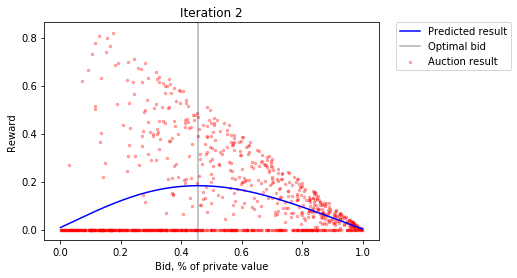

Iteration # 3 

Iteration 1, loss = 0.03166466
Iteration 2, loss = 0.01553017
Iteration 3, loss = 0.01549986
Iteration 4, loss = 0.01545755
Iteration 5, loss = 0.01536669
Iteration 6, loss = 0.01524867
Iteration 7, loss = 0.01483072
Iteration 8, loss = 0.01427925
Iteration 9, loss = 0.01422387
Iteration 10, loss = 0.01420386
Iteration 11, loss = 0.01418885
Iteration 12, loss = 0.01417813
Iteration 13, loss = 0.01417033
Iteration 14, loss = 0.01416482
Iteration 15, loss = 0.01415848
Iteration 16, loss = 0.01415495
Iteration 17, loss = 0.01415112
Iteration 18, loss = 0.01414730
Iteration 19, loss = 0.01414608
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Max expected profit 0.17604
Optimal bid 0.46046
[0.02090826 0.00838747 0.08730796 ... 0.04967403 0.16939997 0.07755326]


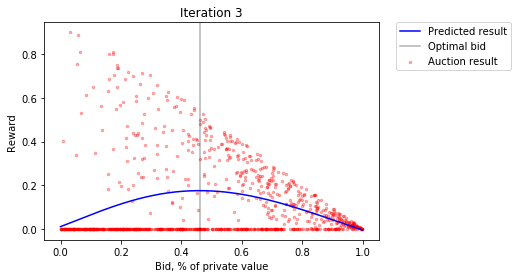

Iteration # 4 

Iteration 1, loss = 0.04557535
Iteration 2, loss = 0.01545220
Iteration 3, loss = 0.01543276
Iteration 4, loss = 0.01542116
Iteration 5, loss = 0.01539805
Iteration 6, loss = 0.01532410
Iteration 7, loss = 0.01500329
Iteration 8, loss = 0.01416351
Iteration 9, loss = 0.01411116
Iteration 10, loss = 0.01410120
Iteration 11, loss = 0.01409319
Iteration 12, loss = 0.01408683
Iteration 13, loss = 0.01408179
Iteration 14, loss = 0.01407692
Iteration 15, loss = 0.01407459
Iteration 16, loss = 0.01407174
Iteration 17, loss = 0.01406791
Iteration 18, loss = 0.01406555
Iteration 19, loss = 0.01406442
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Max expected profit 0.18263
Optimal bid 0.47047
[0.17887803 0.03892662 0.16982686 ... 0.15713449 0.17874503 0.14216268]


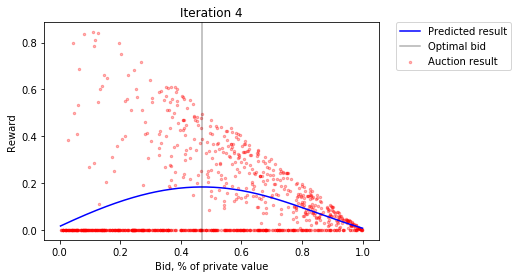

Iteration # 5 

Iteration 1, loss = 0.01530132
Iteration 2, loss = 0.01528906
Iteration 3, loss = 0.01528548
Iteration 4, loss = 0.01528035
Iteration 5, loss = 0.01526681
Iteration 6, loss = 0.01518852
Iteration 7, loss = 0.01434023
Iteration 8, loss = 0.01396774
Iteration 9, loss = 0.01396363
Iteration 10, loss = 0.01395899
Iteration 11, loss = 0.01395688
Iteration 12, loss = 0.01395491
Iteration 13, loss = 0.01395288
Iteration 14, loss = 0.01395230
Iteration 15, loss = 0.01395246
Iteration 16, loss = 0.01394974
Iteration 17, loss = 0.01394863
Iteration 18, loss = 0.01394947
Iteration 19, loss = 0.01394813
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Max expected profit 0.17568
Optimal bid 0.46947
[0.1425471  0.06864411 0.16682391 ... 0.03348124 0.12780539 0.15534969]


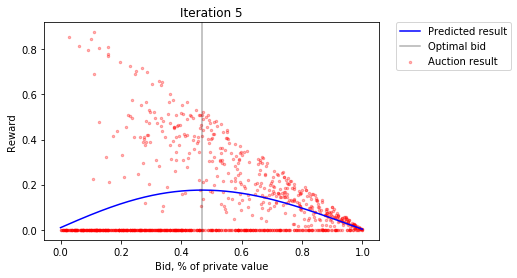

Iteration # 6 

Iteration 1, loss = 0.01532879
Iteration 2, loss = 0.01529204
Iteration 3, loss = 0.01528964
Iteration 4, loss = 0.01528367
Iteration 5, loss = 0.01526858
Iteration 6, loss = 0.01519737
Iteration 7, loss = 0.01436127
Iteration 8, loss = 0.01398244
Iteration 9, loss = 0.01397328
Iteration 10, loss = 0.01397018
Iteration 11, loss = 0.01396803
Iteration 12, loss = 0.01396711
Iteration 13, loss = 0.01396394
Iteration 14, loss = 0.01396205
Iteration 15, loss = 0.01396139
Iteration 16, loss = 0.01396072
Iteration 17, loss = 0.01395835
Iteration 18, loss = 0.01395859
Iteration 19, loss = 0.01395692
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Max expected profit 0.17391
Optimal bid 0.46346
[0.10527769 0.0430042  0.17285312 ... 0.02682722 0.04418961 0.10112173]


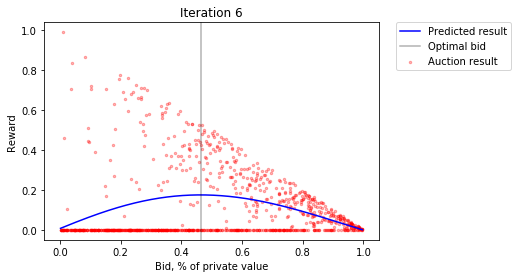

Iteration # 7 

Iteration 1, loss = 0.01541915
Iteration 2, loss = 0.01540676
Iteration 3, loss = 0.01540290
Iteration 4, loss = 0.01539375
Iteration 5, loss = 0.01536680
Iteration 6, loss = 0.01520945
Iteration 7, loss = 0.01436027
Iteration 8, loss = 0.01408152
Iteration 9, loss = 0.01407398
Iteration 10, loss = 0.01406874
Iteration 11, loss = 0.01406529
Iteration 12, loss = 0.01406184
Iteration 13, loss = 0.01405870
Iteration 14, loss = 0.01405624
Iteration 15, loss = 0.01405406
Iteration 16, loss = 0.01405236
Iteration 17, loss = 0.01404977
Iteration 18, loss = 0.01404916
Iteration 19, loss = 0.01404789
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Max expected profit 0.16671
Optimal bid 0.47247
[ 0.10526649  0.12225559 -0.00315909 ...  0.03269773  0.14859986
  0.16159222]


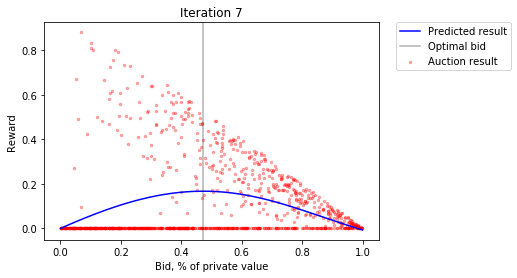

Iteration # 8 

Iteration 1, loss = 0.01527322
Iteration 2, loss = 0.01525833
Iteration 3, loss = 0.01525318
Iteration 4, loss = 0.01524581
Iteration 5, loss = 0.01523020
Iteration 6, loss = 0.01513080
Iteration 7, loss = 0.01416713
Iteration 8, loss = 0.01397752
Iteration 9, loss = 0.01397006
Iteration 10, loss = 0.01396569
Iteration 11, loss = 0.01396206
Iteration 12, loss = 0.01395777
Iteration 13, loss = 0.01395484
Iteration 14, loss = 0.01395381
Iteration 15, loss = 0.01395076
Iteration 16, loss = 0.01394822
Iteration 17, loss = 0.01394825
Iteration 18, loss = 0.01394651
Iteration 19, loss = 0.01394573
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Max expected profit 0.1727
Optimal bid 0.47347
[0.03364019 0.13110835 0.13879966 ... 0.09294717 0.09481115 0.03246752]


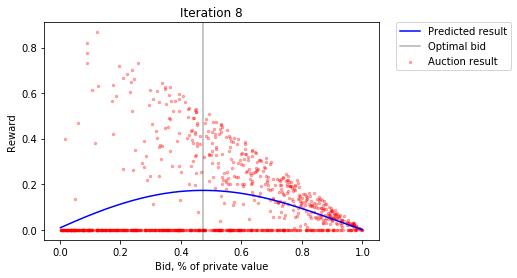

Iteration # 9 

Iteration 1, loss = 0.01746667
Iteration 2, loss = 0.01520511
Iteration 3, loss = 0.01520270
Iteration 4, loss = 0.01519920
Iteration 5, loss = 0.01519585
Iteration 6, loss = 0.01518950
Iteration 7, loss = 0.01517338
Iteration 8, loss = 0.01511326
Iteration 9, loss = 0.01443694
Iteration 10, loss = 0.01393466
Iteration 11, loss = 0.01392178
Iteration 12, loss = 0.01391540
Iteration 13, loss = 0.01390977
Iteration 14, loss = 0.01390535
Iteration 15, loss = 0.01390109
Iteration 16, loss = 0.01389907
Iteration 17, loss = 0.01389658
Iteration 18, loss = 0.01389448
Iteration 19, loss = 0.01389275
Iteration 20, loss = 0.01389077
Iteration 21, loss = 0.01388895
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Max expected profit 0.17293
Optimal bid 0.46947
[0.13451533 0.16322366 0.01962268 ... 0.17292014 0.04132003 0.16455207]


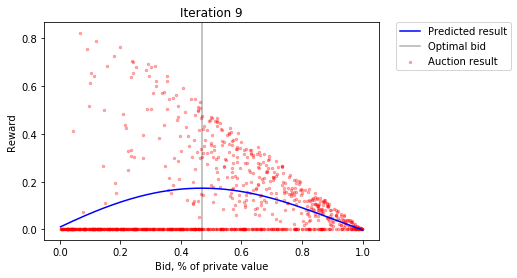

Iteration # 10 

Iteration 1, loss = 0.01731907
Iteration 2, loss = 0.01523689
Iteration 3, loss = 0.01523708
Iteration 4, loss = 0.01523640
Iteration 5, loss = 0.01523577
Iteration 6, loss = 0.01523571
Iteration 7, loss = 0.01523494
Iteration 8, loss = 0.01523430
Iteration 9, loss = 0.01523354
Iteration 10, loss = 0.01523199
Iteration 11, loss = 0.01522937
Iteration 12, loss = 0.01522594
Iteration 13, loss = 0.01521344
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Max expected profit 0.12214
Optimal bid 0.0
[0.11988958 0.11446642 0.10107949 ... 0.11227478 0.12018328 0.10782621]


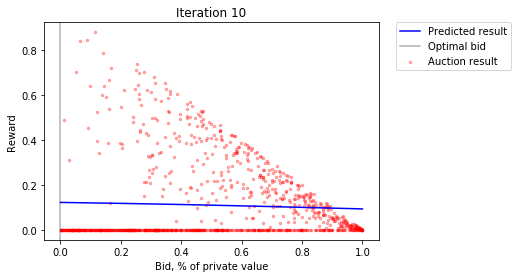

Iteration # 11 

Iteration 1, loss = 0.01638251
Iteration 2, loss = 0.01524664
Iteration 3, loss = 0.01524011
Iteration 4, loss = 0.01521846
Iteration 5, loss = 0.01476333
Iteration 6, loss = 0.01404375
Iteration 7, loss = 0.01401312
Iteration 8, loss = 0.01399642
Iteration 9, loss = 0.01398398
Iteration 10, loss = 0.01397493
Iteration 11, loss = 0.01397017
Iteration 12, loss = 0.01396541
Iteration 13, loss = 0.01395966
Iteration 14, loss = 0.01395842
Iteration 15, loss = 0.01395536
Iteration 16, loss = 0.01395427
Iteration 17, loss = 0.01395116
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Max expected profit 0.1655
Optimal bid 0.46947
[0.06472668 0.13783305 0.1065682  ... 0.07095183 0.09494248 0.12249496]


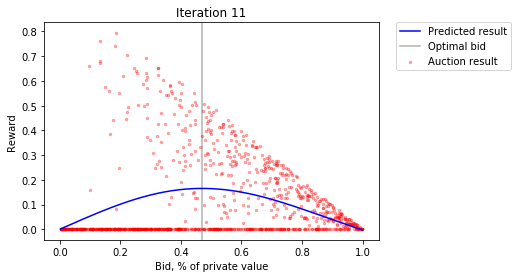

Iteration # 12 

Iteration 1, loss = 0.01550250
Iteration 2, loss = 0.01529470
Iteration 3, loss = 0.01529107
Iteration 4, loss = 0.01528232
Iteration 5, loss = 0.01525570
Iteration 6, loss = 0.01510405
Iteration 7, loss = 0.01428347
Iteration 8, loss = 0.01400429
Iteration 9, loss = 0.01399566
Iteration 10, loss = 0.01399050
Iteration 11, loss = 0.01398585
Iteration 12, loss = 0.01398195
Iteration 13, loss = 0.01397887
Iteration 14, loss = 0.01397712
Iteration 15, loss = 0.01397543
Iteration 16, loss = 0.01397447
Iteration 17, loss = 0.01397180
Iteration 18, loss = 0.01397035
Iteration 19, loss = 0.01396827
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Max expected profit 0.17499
Optimal bid 0.47047
[0.16764589 0.02338307 0.1243786  ... 0.1748735  0.09799873 0.16581545]


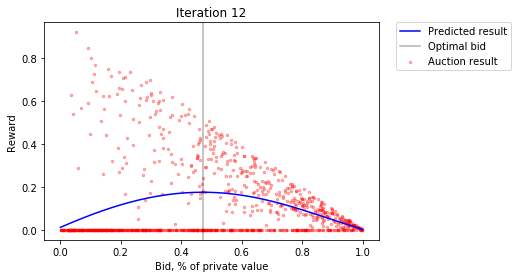

Iteration # 13 

Iteration 1, loss = 0.01534841
Iteration 2, loss = 0.01522794
Iteration 3, loss = 0.01521911
Iteration 4, loss = 0.01519928
Iteration 5, loss = 0.01509304
Iteration 6, loss = 0.01434256
Iteration 7, loss = 0.01397832
Iteration 8, loss = 0.01396084
Iteration 9, loss = 0.01394981
Iteration 10, loss = 0.01394166
Iteration 11, loss = 0.01393529
Iteration 12, loss = 0.01393088
Iteration 13, loss = 0.01392858
Iteration 14, loss = 0.01392450
Iteration 15, loss = 0.01392294
Iteration 16, loss = 0.01392037
Iteration 17, loss = 0.01391911
Iteration 18, loss = 0.01391617
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Max expected profit 0.17814
Optimal bid 0.48248
[0.17669792 0.01512331 0.12229562 ... 0.1658254  0.16077508 0.16350527]


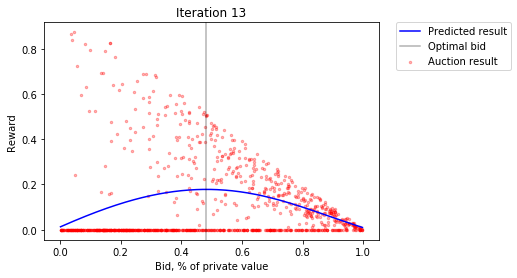

Iteration # 14 

Iteration 1, loss = 0.01506036
Iteration 2, loss = 0.01504467
Iteration 3, loss = 0.01504253
Iteration 4, loss = 0.01504080
Iteration 5, loss = 0.01503695
Iteration 6, loss = 0.01502090
Iteration 7, loss = 0.01475430
Iteration 8, loss = 0.01387591
Iteration 9, loss = 0.01381778
Iteration 10, loss = 0.01380912
Iteration 11, loss = 0.01380230
Iteration 12, loss = 0.01379828
Iteration 13, loss = 0.01379551
Iteration 14, loss = 0.01379151
Iteration 15, loss = 0.01379009
Iteration 16, loss = 0.01378837
Iteration 17, loss = 0.01378576
Iteration 18, loss = 0.01378559
Iteration 19, loss = 0.01378313
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Max expected profit 0.17469
Optimal bid 0.46947
[0.03104201 0.11465097 0.1375575  ... 0.1636954  0.05450875 0.16880844]


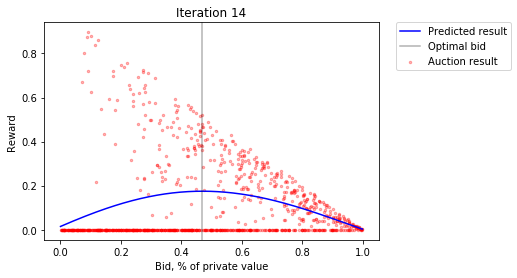

Iteration # 15 

Iteration 1, loss = 0.03583101
Iteration 2, loss = 0.01527272
Iteration 3, loss = 0.01526105
Iteration 4, loss = 0.01523776
Iteration 5, loss = 0.01516364
Iteration 6, loss = 0.01441268
Iteration 7, loss = 0.01395266
Iteration 8, loss = 0.01394596
Iteration 9, loss = 0.01394306
Iteration 10, loss = 0.01393971
Iteration 11, loss = 0.01393686
Iteration 12, loss = 0.01393349
Iteration 13, loss = 0.01393288
Iteration 14, loss = 0.01393137
Iteration 15, loss = 0.01392909
Iteration 16, loss = 0.01392800
Iteration 17, loss = 0.01392685
Iteration 18, loss = 0.01392649
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Max expected profit 0.17018
Optimal bid 0.46847
[0.00810419 0.06857184 0.14010338 ... 0.13913598 0.03683735 0.16906318]


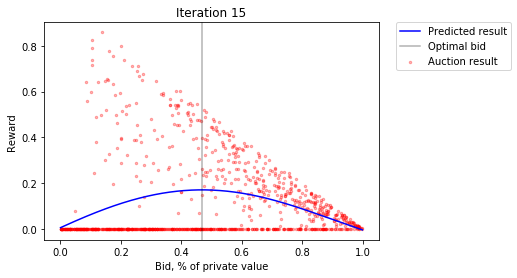

Iteration # 16 

Iteration 1, loss = 0.01555334
Iteration 2, loss = 0.01532200
Iteration 3, loss = 0.01532094
Iteration 4, loss = 0.01531886
Iteration 5, loss = 0.01531934
Iteration 6, loss = 0.01531727
Iteration 7, loss = 0.01531552
Iteration 8, loss = 0.01531244
Iteration 9, loss = 0.01530624
Iteration 10, loss = 0.01528510
Iteration 11, loss = 0.01497275
Iteration 12, loss = 0.01407548
Iteration 13, loss = 0.01401076
Iteration 14, loss = 0.01400144
Iteration 15, loss = 0.01399806
Iteration 16, loss = 0.01399316
Iteration 17, loss = 0.01399035
Iteration 18, loss = 0.01399006
Iteration 19, loss = 0.01398634
Iteration 20, loss = 0.01398559
Iteration 21, loss = 0.01398448
Iteration 22, loss = 0.01398140
Iteration 23, loss = 0.01398053
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Max expected profit 0.17077
Optimal bid 0.46647
[0.1467263  0.1705503  0.01085367 ... 0.10099874 0.13043151 0.02338037]


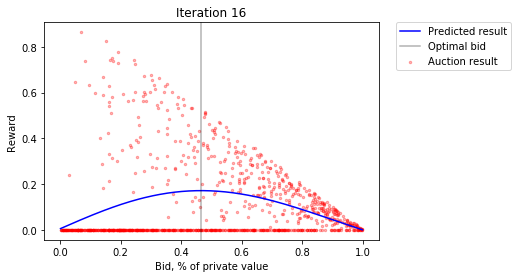

Iteration # 17 

Iteration 1, loss = 0.01529289
Iteration 2, loss = 0.01523510
Iteration 3, loss = 0.01523394
Iteration 4, loss = 0.01523284
Iteration 5, loss = 0.01522993
Iteration 6, loss = 0.01522754
Iteration 7, loss = 0.01522306
Iteration 8, loss = 0.01520991
Iteration 9, loss = 0.01514197
Iteration 10, loss = 0.01434147
Iteration 11, loss = 0.01392557
Iteration 12, loss = 0.01391847
Iteration 13, loss = 0.01391294
Iteration 14, loss = 0.01390818
Iteration 15, loss = 0.01390587
Iteration 16, loss = 0.01390220
Iteration 17, loss = 0.01389998
Iteration 18, loss = 0.01389775
Iteration 19, loss = 0.01389578
Iteration 20, loss = 0.01389463
Iteration 21, loss = 0.01389288
Iteration 22, loss = 0.01389115
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Max expected profit 0.17304
Optimal bid 0.46747
[0.11519795 0.16651708 0.08760174 ... 0.14601626 0.17250489 0.02032648]


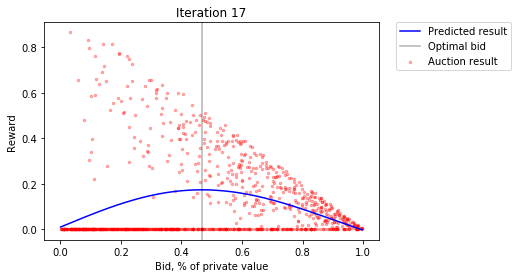

Iteration # 18 

Iteration 1, loss = 0.01862943
Iteration 2, loss = 0.01534649
Iteration 3, loss = 0.01534594
Iteration 4, loss = 0.01534354
Iteration 5, loss = 0.01534122
Iteration 6, loss = 0.01533568
Iteration 7, loss = 0.01532474
Iteration 8, loss = 0.01516558
Iteration 9, loss = 0.01414102
Iteration 10, loss = 0.01399904
Iteration 11, loss = 0.01399016
Iteration 12, loss = 0.01398795
Iteration 13, loss = 0.01398520
Iteration 14, loss = 0.01398362
Iteration 15, loss = 0.01398117
Iteration 16, loss = 0.01398075
Iteration 17, loss = 0.01398012
Iteration 18, loss = 0.01397863
Iteration 19, loss = 0.01397693
Iteration 20, loss = 0.01397747
Iteration 21, loss = 0.01397648
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Max expected profit 0.17161
Optimal bid 0.46146
[0.15755915 0.13573344 0.16997274 ... 0.02047463 0.17083751 0.0108821 ]


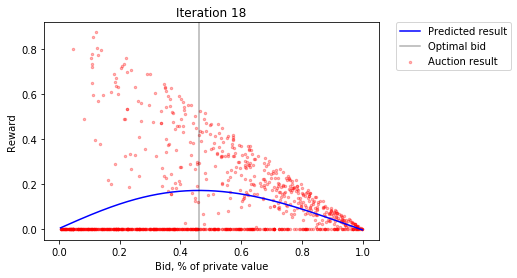

Iteration # 19 

Iteration 1, loss = 0.01582133
Iteration 2, loss = 0.01545501
Iteration 3, loss = 0.01545360
Iteration 4, loss = 0.01545014
Iteration 5, loss = 0.01544862
Iteration 6, loss = 0.01544413
Iteration 7, loss = 0.01543388
Iteration 8, loss = 0.01538588
Iteration 9, loss = 0.01471206
Iteration 10, loss = 0.01410958
Iteration 11, loss = 0.01410129
Iteration 12, loss = 0.01409588
Iteration 13, loss = 0.01409297
Iteration 14, loss = 0.01408930
Iteration 15, loss = 0.01408772
Iteration 16, loss = 0.01408390
Iteration 17, loss = 0.01408300
Iteration 18, loss = 0.01408008
Iteration 19, loss = 0.01407892
Iteration 20, loss = 0.01407905
Iteration 21, loss = 0.01407699
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Max expected profit 0.17617
Optimal bid 0.46847
[0.01977589 0.12397978 0.02275302 ... 0.00429673 0.02072693 0.17613391]


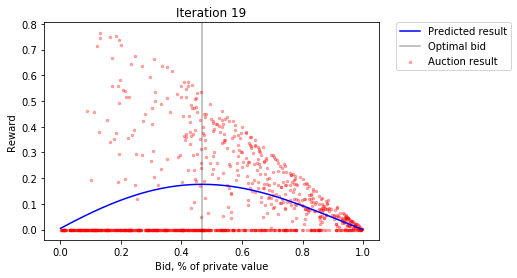

In [9]:
np.random.seed(12)

# number of observations in the dataset
n = 1000000

vector_opt_bids = []

for iter in range(20):
    
    print("Iteration #", iter, "\n")
    
    # In the first round opponent plays randomly, after that - usinf the optimal bid
    if iter==0:
        act_opponent = np.random.beta(1,1,n)
    else:
        if optimal_bid==0 or optimal_bid==1:
            optimal_bid = vector_opt_bids[-2]
        act_opponent = np.repeat(optimal_bid, n)
        
    # prepare data
    X, y = prepare_data(np.random.beta(1,1,n), act_opponent, n)

    # fit the model
    mlp = fit_model(X, y)

    # determine optimal bid
    optimal_bid = opt_bid(mlp)
    vector_opt_bids += [optimal_bid]

    # plot results
    title = "Iteration " + str(iter)
    plot_result(mlp, X, y, optimal_bid, title)
    

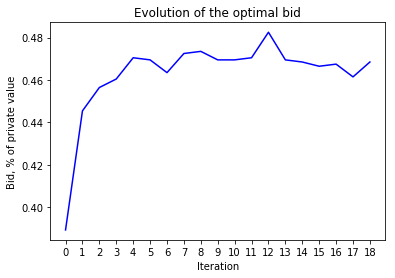

In [22]:
# delete cases of bid=0 or bid=1
vector_opt_bids_clean = vector_opt_bids[:]
#vector_opt_bids_clean.remove(0)


#### Create graph
fig = plt.figure() 

# Convergence of the optimal bid
opt_bid_line = plt.plot(range(0, 19), vector_opt_bids_clean, label="Optimal bid", color='b') 

# ticks of the x axis
plt.xticks(range(0, 19))

# Labels
plt.title("Evolution of the optimal bid")
plt.xlabel('Iteration')
plt.ylabel('Bid, % of private value')


plt.show()